In [2]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def to_csv():
    with open('gpu_price.json', 'r') as file:
        data_dict = json.load(file)
        flattened_data = []   
        for key, model_data in data_dict.items():
            model_data['Model name'] = model_data['Model name']
            flattened_data.append(model_data)
        df = pd.DataFrame(flattened_data)
        df.to_csv('gpu_data.csv', index=False)


In [3]:
df = pd.read_csv('gpu_data.csv')
df.head(5)

,Model name,Launch,Code name,Fab (nm),Transistors (million),Die size (mm),Bus interface,Core clock (MHz),Memory clock (MHz),Core config,...,Branding and Model,Branding and Model Branding and Model.1,MSRP (USD),L2 cache,Clock rate (MHz),Processing power (TFLOPS) Half precision (base),Processing power (TFLOPS) Single precision (base),Processing power (TFLOPS) Double precision (base),Processing power (TFLOPS) XMX Half Precision,Processing power (TFLOPS) Bfloat16
0,NV1,1995-05-22 00:00:00,NV1,SGS 500 nm,1.0,90.0,PCI,75,60,1:1:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Riva 128,1997-08-25 00:00:00,NV3,SGS 350 nm,4.0,90.0,"AGP 1x, PCI",100,100,1:1:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riva 128ZX,1998-02-23 00:00:00,NV3,SGS/TSMC 350 nm,4.0,90.0,"AGP 2x, PCI",100,100,1:1:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Riva TNT,1998-06-15 00:00:00,NV4,TSMC 350 nm,7.0,90.0,"AGP 2x, PCI",90,110,2:2:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vanta,1999-03-22 00:00:00,NV6,TSMC 250 nm,NaN,NaN,"AGP 4x, PCI",100,125,2:2:2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
price_cols = [
    c for c in df.columns
    if re.search(r"price|msrp|cost|usd|\$", c, re.IGNORECASE)
]

df[price_cols].isna().mean().sort_values(ascending=False)

MSRP (USD)                              0.994659
Release price (USD) Founders Edition    0.961424
Release price (USD) MSRP                0.951929
Release price (USD)                     0.942433
Release Date & Price                    0.928190
Release Price (USD)                     0.911573
dtype: float64

In [5]:
year_cols = [
    c for c in df.columns
    if re.search(r"year|date|launch|release|announced", c, re.IGNORECASE)
]

df["Launch"].describe()
# df[year_cols].isna().mean().sort_values(ascending=False)

count                    1398
unique                    569
top       2012-01-01 00:00:00
freq                       54
Name: Launch, dtype: object

In [6]:
vendor_cols = [
    c for c in df.columns
    if re.search(r"manufacturer|vendor|brand|company", c, re.IGNORECASE)
]

df[vendor_cols].isna().mean().sort_values(ascending=False)
df["Vendor"].describe()

count       1685
unique         3
top       NVIDIA
freq         872
Name: Vendor, dtype: object

In [7]:
name_cols = [
    c for c in df.columns
    if re.search(r"name|model|product", c, re.IGNORECASE)
]

df[name_cols].isna().mean().sort_values(ascending=False)
df["Model"].tail()

1680                         NaN
1681                         NaN
1682    Data Center GPU Max 1100
1683    Data Center GPU Max 1350
1684    Data Center GPU Max 1550
Name: Model, dtype: str

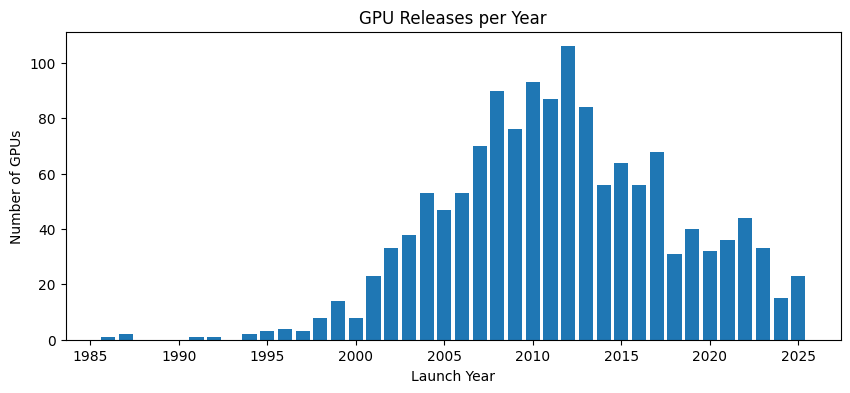

In [8]:
df["Launch"] = pd.to_datetime(df["Launch"], errors="coerce")

df["launch_year"] = df["Launch"].dt.year

year_counts = df["launch_year"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.bar(year_counts.index, year_counts.values)

plt.xlabel("Launch Year")
plt.ylabel("Number of GPUs")
plt.title("GPU Releases per Year")

plt.show()

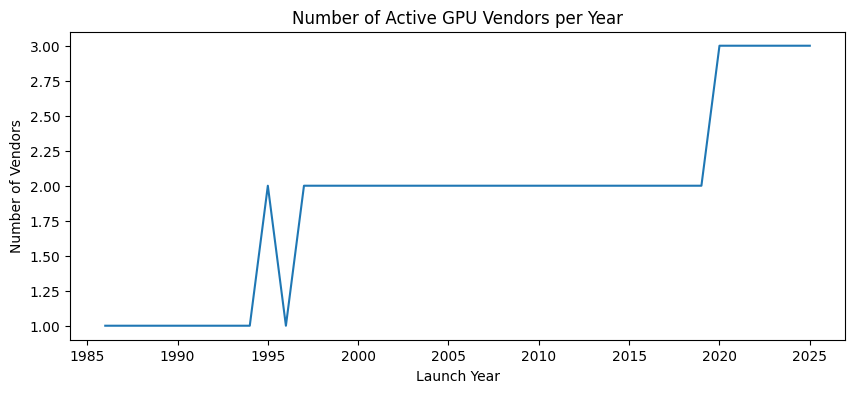

In [9]:
vendors_per_year = (
    df.groupby("launch_year")["Vendor"]
    .nunique()
)

plt.figure(figsize=(10, 4))
plt.plot(vendors_per_year.index, vendors_per_year.values)

plt.xlabel("Launch Year")
plt.ylabel("Number of Vendors")
plt.title("Number of Active GPU Vendors per Year")

plt.show()

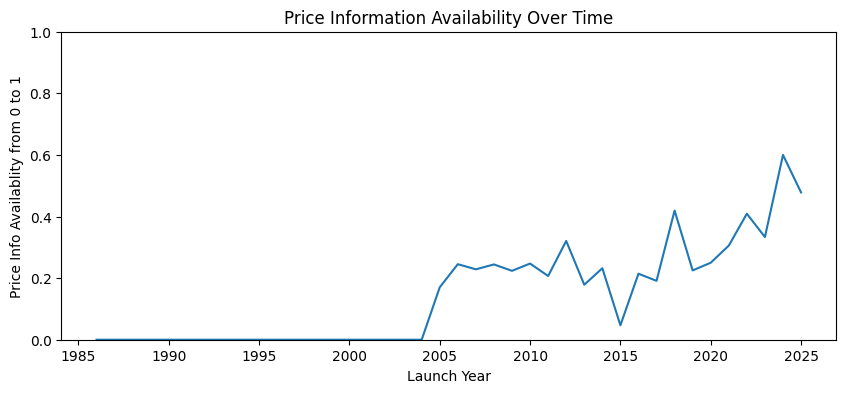

In [11]:
price_available = (
    df.groupby("launch_year")["price_usd"]
    .apply(lambda x: x.notna().mean())
)

plt.figure(figsize=(10, 4))
plt.plot(price_available.index, price_available.values)

plt.xlabel("Launch Year")
plt.ylabel("Price Info Availablity from 0 to 1")
plt.title("Price Information Availability Over Time")

plt.ylim(0, 1)
plt.show()

In [75]:
performance_cols = [
    c for c in df.columns
    if re.search(r"performance|power", c, re.IGNORECASE)
]

df[performance_cols].isna().mean().head()

Performance (GFLOPS)                                           0.936499
Processing power (GFLOPS) Single precision                     0.708012
Processing power (GFLOPS) Double precision                     0.803561
Processing power (GFLOPS) Half precision                       0.954303
Processing power (GFLOPS) Tensor compute + Single precision    0.998813
dtype: float64

In [76]:
fp32_cols = [
    'Performance (GFLOPS)',
    'Processing power (GFLOPS) Single precision',
    'Processing power (GFLOPS) Single precision (Boost)',
    'Processing power (TFLOPS) Single precision',
    'Processing power (TFLOPS) Single',
    'Processing power (TFLOPS) Single precision (base)',
    'Processing power (TFLOPS) Single precision (MAD or FMA)',
]

def to_tflops(series, col):
    s = pd.to_numeric(series, errors="coerce")
    return s / 1000 if "GFLOPS" in col else s

fp32_df = pd.DataFrame({
    c: to_tflops(df[c], c) for c in fp32_cols if c in df.columns
})

df["fp32_score"] = fp32_df.max(axis=1)

In [77]:
tensor_cols = [
    'Processing power (TFLOPS) Tensor',
    'Processing power (TFLOPS) Tensor compute (FP16)',
    'Processing power (TFLOPS) Tensor compute FP16 (2:1 sparse)',
    'Processing power (TFLOPS) Tensor compute FP4 (2:1 sparse)',
]

ray_cols = [
    'Ray tracing Performance Rays/s (Billions)',
    'Ray tracing Performance RTX OPS/s (Trillions)',
    'Ray tracing Performance (TFLOPS)',
]

df["tensor_score"] = df[tensor_cols].apply(
    pd.to_numeric, errors="coerce"
).max(axis=1)

df["ray_score"] = df[ray_cols].apply(
    pd.to_numeric, errors="coerce"
).max(axis=1)

In [79]:
for col in ["fp32_score", "tensor_score", "ray_score"]:
    med = df[col].median(skipna=True)
    df[col + "_norm"] = df[col] / med

df["compute_score"] = (
    df["fp32_score_norm"].fillna(0) +
    0.5 * df["tensor_score_norm"].fillna(0) +
    0.3 * df["ray_score_norm"].fillna(0)
)

df["perf_per_dollar"] = (
    df["compute_score"] / df["price_usd_clean"]
)

core = df[
    df["perf_per_dollar"].notna() &
    df["launch_year"].notna()
].copy()

core["perf_per_dollar"].describe()

count    209.000000
mean       0.012600
std        0.025924
min        0.000000
25%        0.000000
50%        0.001163
75%        0.012965
max        0.148382
Name: perf_per_dollar, dtype: float64

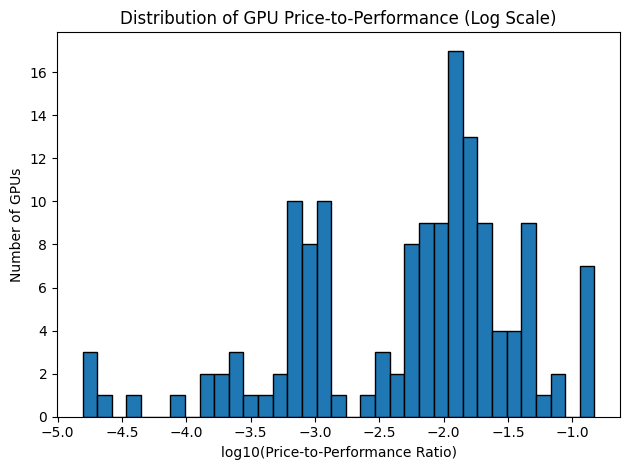

In [81]:
plt.hist(
    np.log10(core["perf_per_dollar"].replace(0, np.nan)),
    bins=35,
    edgecolor="black"
)
plt.xlabel("log10(Price-to-Performance Ratio)")
plt.ylabel("Number of GPUs")
plt.title("Distribution of GPU Price-to-Performance (Log Scale)")
plt.tight_layout()
plt.show()

In [83]:
perf_cols_priority = [
    "Processing power (TFLOPS) Single precision",
    "Processing power (GFLOPS) Single precision",
    "Performance (GFLOPS)",
    "Processing power (GFLOPS)"
]

core["perf_value"] = (
    core[perf_cols_priority]
    .apply(pd.to_numeric, errors="coerce")
    .bfill(axis=1)
    .iloc[:, 0]
)

core["perf_per_dollar"] = core["perf_value"] / core["price_usd_clean"]

core = core.replace([np.inf, -np.inf], np.nan)
core = core.dropna(subset=["perf_per_dollar", "launch_year"])

In [100]:
best_per_year = (
    core
    .sort_values("perf_per_dollar", ascending=False)
    .groupby("launch_year", as_index=False)
    .first()
)

best_per_year.tail()

,launch_year,Model name,Launch,Code name,Fab (nm),Transistors (million),Die size (mm),Bus interface,Core clock (MHz),Memory clock (MHz),...,price_usd_clean,fp32_score,tensor_score,ray_score,fp32_score_norm,tensor_score_norm,ray_score_norm,compute_score,perf_per_dollar,perf_value
13,2021.0,RTX A4000,2021-04-12,GA104-875-A1,8,NaN,NaN,PCIe 4.0 x16,735,1750 (14000),...,500.0,19.17,NaN,NaN,21.883562,NaN,NaN,21.883562,0.038340,19.17
14,2022.0,RTX 6000 Ada Generation,2022-12-03,AD102-870-A1,TSMC 4N,NaN,NaN,PCIe 4.0 x16,915,2500 (20000),...,3399.5,91.06,NaN,NaN,103.949772,NaN,NaN,103.949772,0.026786,91.06
15,2023.0,RTX 4000 Ada Generation,2023-08-09,AD104,TSMC 4N,NaN,NaN,PCIe 4.0 x16,1500,1750 (14000),...,625.0,26.73,NaN,NaN,30.513699,NaN,NaN,30.513699,0.042768,26.73
16,2024.0,RTX A400,2024-12-13,BMG-G21,8,NaN,272,PCIe 4.0 x8,727,1500 (12000),...,124.5,13.67,NaN,NaN,15.605023,NaN,NaN,15.605023,0.109799,13.67
17,2025.0,GeForce RTX 5060,2025-05-19,GB206-250,TSMC 4N,NaN,181 mm,PCIe 5.0 x8,1590,1750,...,149.5,19.18,NaN,58.0,21.894977,NaN,0.960265,22.183057,0.128294,19.18


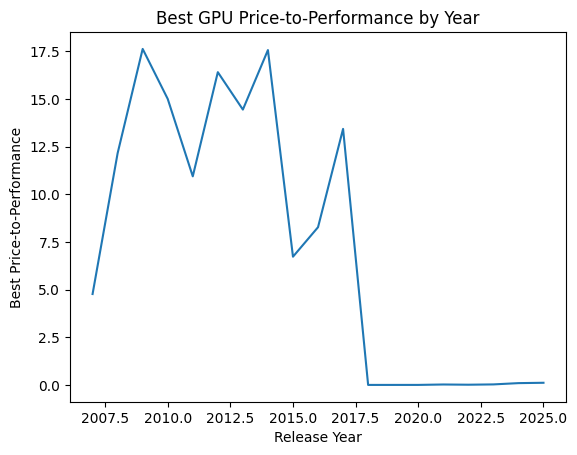

In [96]:
plt.figure()
plt.plot(
    best_per_year["launch_year"],
    best_per_year["perf_per_dollar"]
)
plt.xlabel("Release Year")
plt.ylabel("Best Price-to-Performance")
plt.title("Best GPU Price-to-Performance by Year")
plt.show()

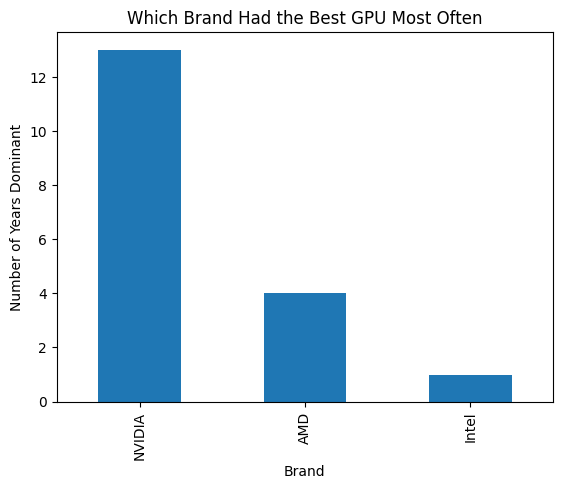

In [95]:
best_per_year["Vendor"].value_counts().plot(kind="bar")
plt.xlabel("Brand")
plt.ylabel("Number of Years Dominant")
plt.title("Which Brand Had the Best GPU Most Often")
plt.show()

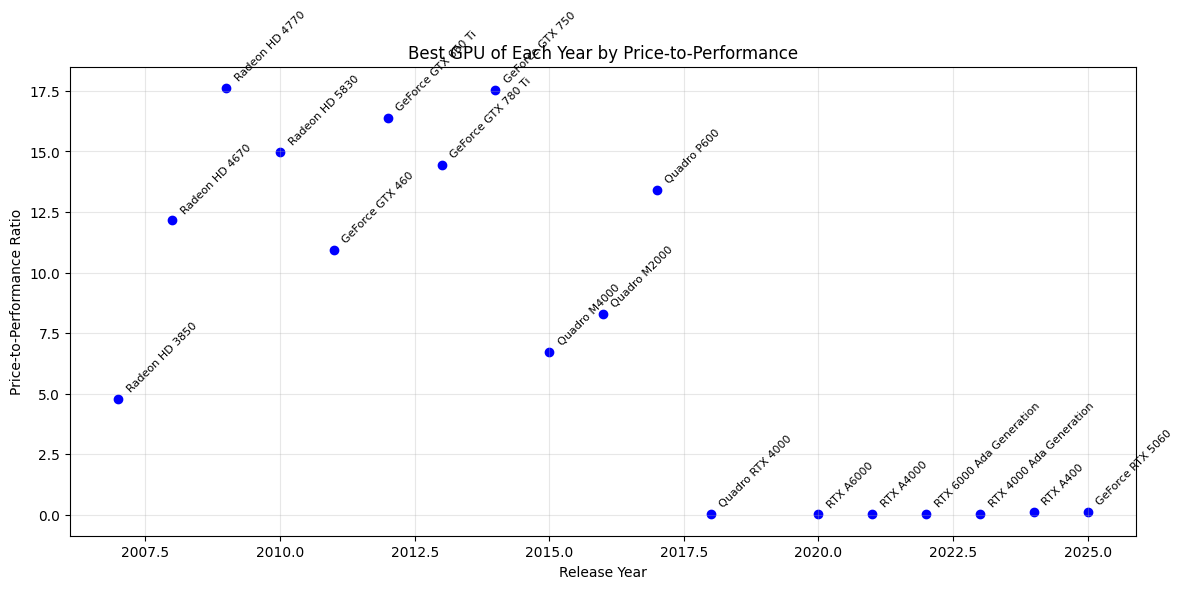

In [105]:
plt.figure(figsize=(12,6))
plt.scatter(
    best_per_year["launch_year"],
    best_per_year["perf_per_dollar"],
    color="blue"
)

for i, row in best_per_year.iterrows():
    label = row["Model"] if not pd.isna(row["Model"]) else row["Model name"]
    plt.annotate(
        label, 
        xy=(row["launch_year"], row["perf_per_dollar"]),
        xytext=(5, 5),                    
        textcoords="offset points",
        fontsize=8, 
        rotation=45
    )

    # plt.text(
    #     row["launch_year"],
    #     row["perf_per_dollar"], 
    #     label,
    #     fontsize=8, 
    #     rotation=45,
    #     ha="right"
    # )

plt.xlabel("Release Year")
plt.ylabel("Price-to-Performance Ratio")
plt.title("Best GPU of Each Year by Price-to-Performance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()